Score of kn is 0.0
Numpy Array : 
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]] 
 type :<class 'numpy.ndarray'> 
 Shape:(49, 2)
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 3

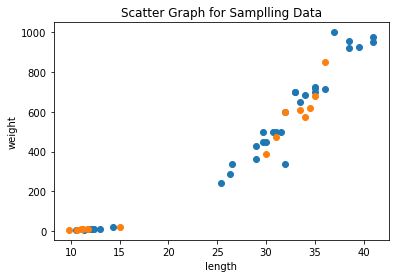

Score of KN - Samplling Data is 1.0


In [26]:
#데이터 준비 

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

#모듈 호출
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

#데이터 분리하기 (Train 데이터, Test 데이터 분리)
#단순 슬라이싱으로 분리
train_input = fish_data[:35]
train_target= fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

kn = kn.fit(train_input, train_target)
kn_score = kn.score(test_input, test_target)
print(f'Score of kn is {kn_score}')
#샘플링이 극단적으로 편형되어 있음.

#numpy 호출 , 배열 만들어주는 라이브러리
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(f'Numpy Array : \n{input_arr} \n type :{type(input_arr)} \n Shape:{input_arr.shape}')

#무작위 수를 부여하여 슬라이싱으로 Trainning Data, Test Data 를 분리 해보자.
index = np.arange(49) # numpy array 형식에 맞추어 0~48까지 숫자 생성함
np.random.seed(42) #42는 랜덤 숫자를 만들기 위한 임의 수임
np.random.shuffle(index) 
print(index) # 인덱스가 무직위로 섞임

#랜덤으로 섞인 index array를 활용하여 슬라이싱으로 Train data, Test data 를 나누기
train_shuffed_input = input_arr[index[:35]]
train_shuffed_target = target_arr[index[:35]]

test_shuffed_input = input_arr[index[35:]]
test_shuffed_target = target_arr[index[35:]]

#데이터가 어떻게 샘플링 되었는지 산점도로 확인
import matplotlib.pyplot as plt
samplling_scatter = plt
samplling_scatter.scatter(train_shuffed_input[:,0], train_shuffed_input[:,1])
samplling_scatter.scatter(test_shuffed_input[:,0],test_shuffed_input[:,1])
samplling_scatter.xlabel('length')
samplling_scatter.ylabel('weight')
samplling_scatter.title('Scatter Graph for Samplling Data')
samplling_scatter.show() # 적당히 섞여 있음을 확인함.

# 데이터가 섞여서 나눠진 Train, Test Data
kn_sampled = kn.fit(train_shuffed_input, train_shuffed_target)
kn_sampled_score = kn_sampled.score(test_shuffed_input, test_shuffed_target)
print(f'Score of KN - Samplling Data is {kn_sampled_score}')


data : 
[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]] 

 target : 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]

 ------------------- 

shape of train data: 
 (36, 2) 

 shape of test data : 
 (13, 2)
 
score of K-NeighborsClassigier: 1.0
Predict Result : [0.]

Distance of Neighbor : 
 [[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] 
Index of Neighbor : 
 [[21 33 19 30  1]]



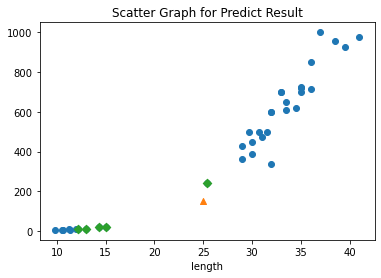

Mean of Data :[ 27.29722222 454.09722222] 
STD of Data : [  9.98244253 323.29893931]

Score of Scaled KN : 1.0

Predict Result : [1.]



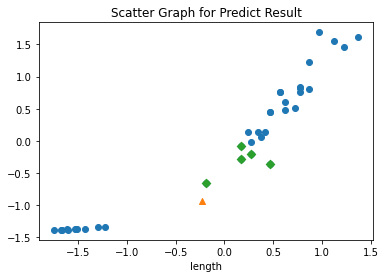

In [36]:
# 데이터 전처리

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np

fish_data = np.column_stack((fish_length, fish_weight)) #두개의 데이터를 하나의 array로 합침
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(f'data : \n{fish_data[:5]} \n\n target : \n{fish_target}') #데이터가 잘 준비되었는지 확인
print('\n ------------------- \n')

#데이터 나누기 - 사이킷런을 사용
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state =42) #random_state에는 임의 값

print(f'shape of train data: \n {train_input.shape} \n\n shape of test data : \n {test_input.shape}\n ')

# KNC 사용해보기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn_score = kn.score(test_input, test_target)
print(f'score of K-NeighborsClassigier: {kn_score}')

#모델로 예측해보기
sample_data =[[25,150]]
predict_sample_data = kn.predict(sample_data)
print(f'Predict Result : {predict_sample_data}\n') # 1:도미, 0:빙어. 빙어로 예측함

distances, indexs = kn.kneighbors(sample_data) #샘플 데이터의 주변 이웃 데이터의 거리와 순서
print(f'Distance of Neighbor : \n {distances} \nIndex of Neighbor : \n {indexs}\n') # 도미


#예측 결과를 그래프로 확인
import matplotlib.pyplot as plt

scatter_graph = plt
scatter_graph.scatter(train_input[:,0], train_input[:,1])
scatter_graph.scatter(sample_data[0][0], sample_data[0][1], marker='^')
scatter_graph.scatter(train_input[indexs,0], train_input[indexs,1], marker='D') 

scatter_graph.xlabel('length')
scatter_graph.title('Scatter Graph for Predict Result')
scatter_graph.show() #길이와 무게의 단위가 다르다 보니 예측이 잘못됨


#표준점수(Z score)로 데이터의 편차를 비율로 구함
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(f'Mean of Data :{mean} \nSTD of Data : {std}\n')

train_scaled = (train_input-mean) / std
test_scaled = (test_input-mean) / std
sample_scaled = (sample_data-mean) / std

kn_scaled = KNeighborsClassifier()
kn_scaled.fit(train_scaled, train_target)
kn_scaled_score = kn_scaled.score(test_scaled, test_target)
print(f'Score of Scaled KN : {kn_scaled_score}\n') # 표준 점수를 부여한 데이터로 학습한 결과 확인

predict_sample_scaled = kn_scaled.predict(sample_scaled) #표준 점수로 변환한 예측 결과
print(f'Predict Result : {predict_sample_scaled}\n') # 1:도미, 0:빙어. 빙어로 예측함

# 그래프로 확인
distances, indexs = kn_scaled.kneighbors(sample_scaled) #샘플 데이터의 주변 이웃 데이터의 거리와 순서

scatter_graph_scaled = plt
scatter_graph_scaled.scatter(train_scaled[:,0], train_scaled[:,1])
scatter_graph_scaled.scatter(sample_scaled[0][0], sample_scaled[0][1], marker='^')
scatter_graph_scaled.scatter(train_scaled[indexs,0], train_scaled[indexs,1], marker='D') 

scatter_graph_scaled.xlabel('length')
scatter_graph_scaled.title('Scatter Graph for Predict Result')
scatter_graph_scaled.show() #길이와 무게의 단위가 다르다 보니 예측이 잘못됨
